In [1]:
import os
os.chdir(path='../')
import scanpy as sc
import pandas as pd
trial_name = "trial-Visium_FFPE_Human_Prostate_Cancer"
data_name = "Visium_FFPE_Human_Prostate_Cancer"

In [2]:
adata = sc.read_h5ad(f"{trial_name}/outputs/stforte.h5ad")
adata

AnnData object with n_obs × n_vars = 4371 × 17943
    obs: 'in_tissue', 'array_row', 'array_col', 'STForte_Mask', 'leiden', 'region_refined'
    var: 'gene_ids', 'feature_types', 'genome'
    uns: 'leiden', 'leiden_color_map', 'leiden_colors', 'neighbors', 'spatial', 'umap'
    obsm: 'STForte_ATTR', 'STForte_COMB', 'STForte_TOPO', 'X_umap', 'spatial'
    obsp: 'connectivities', 'distances'

In [3]:
adata.layers['lognorm'] = adata.X.copy()
sc.pp.normalize_total(adata, target_sum=1e4, layer='lognorm')
sc.pp.log1p(adata, layer='lognorm')

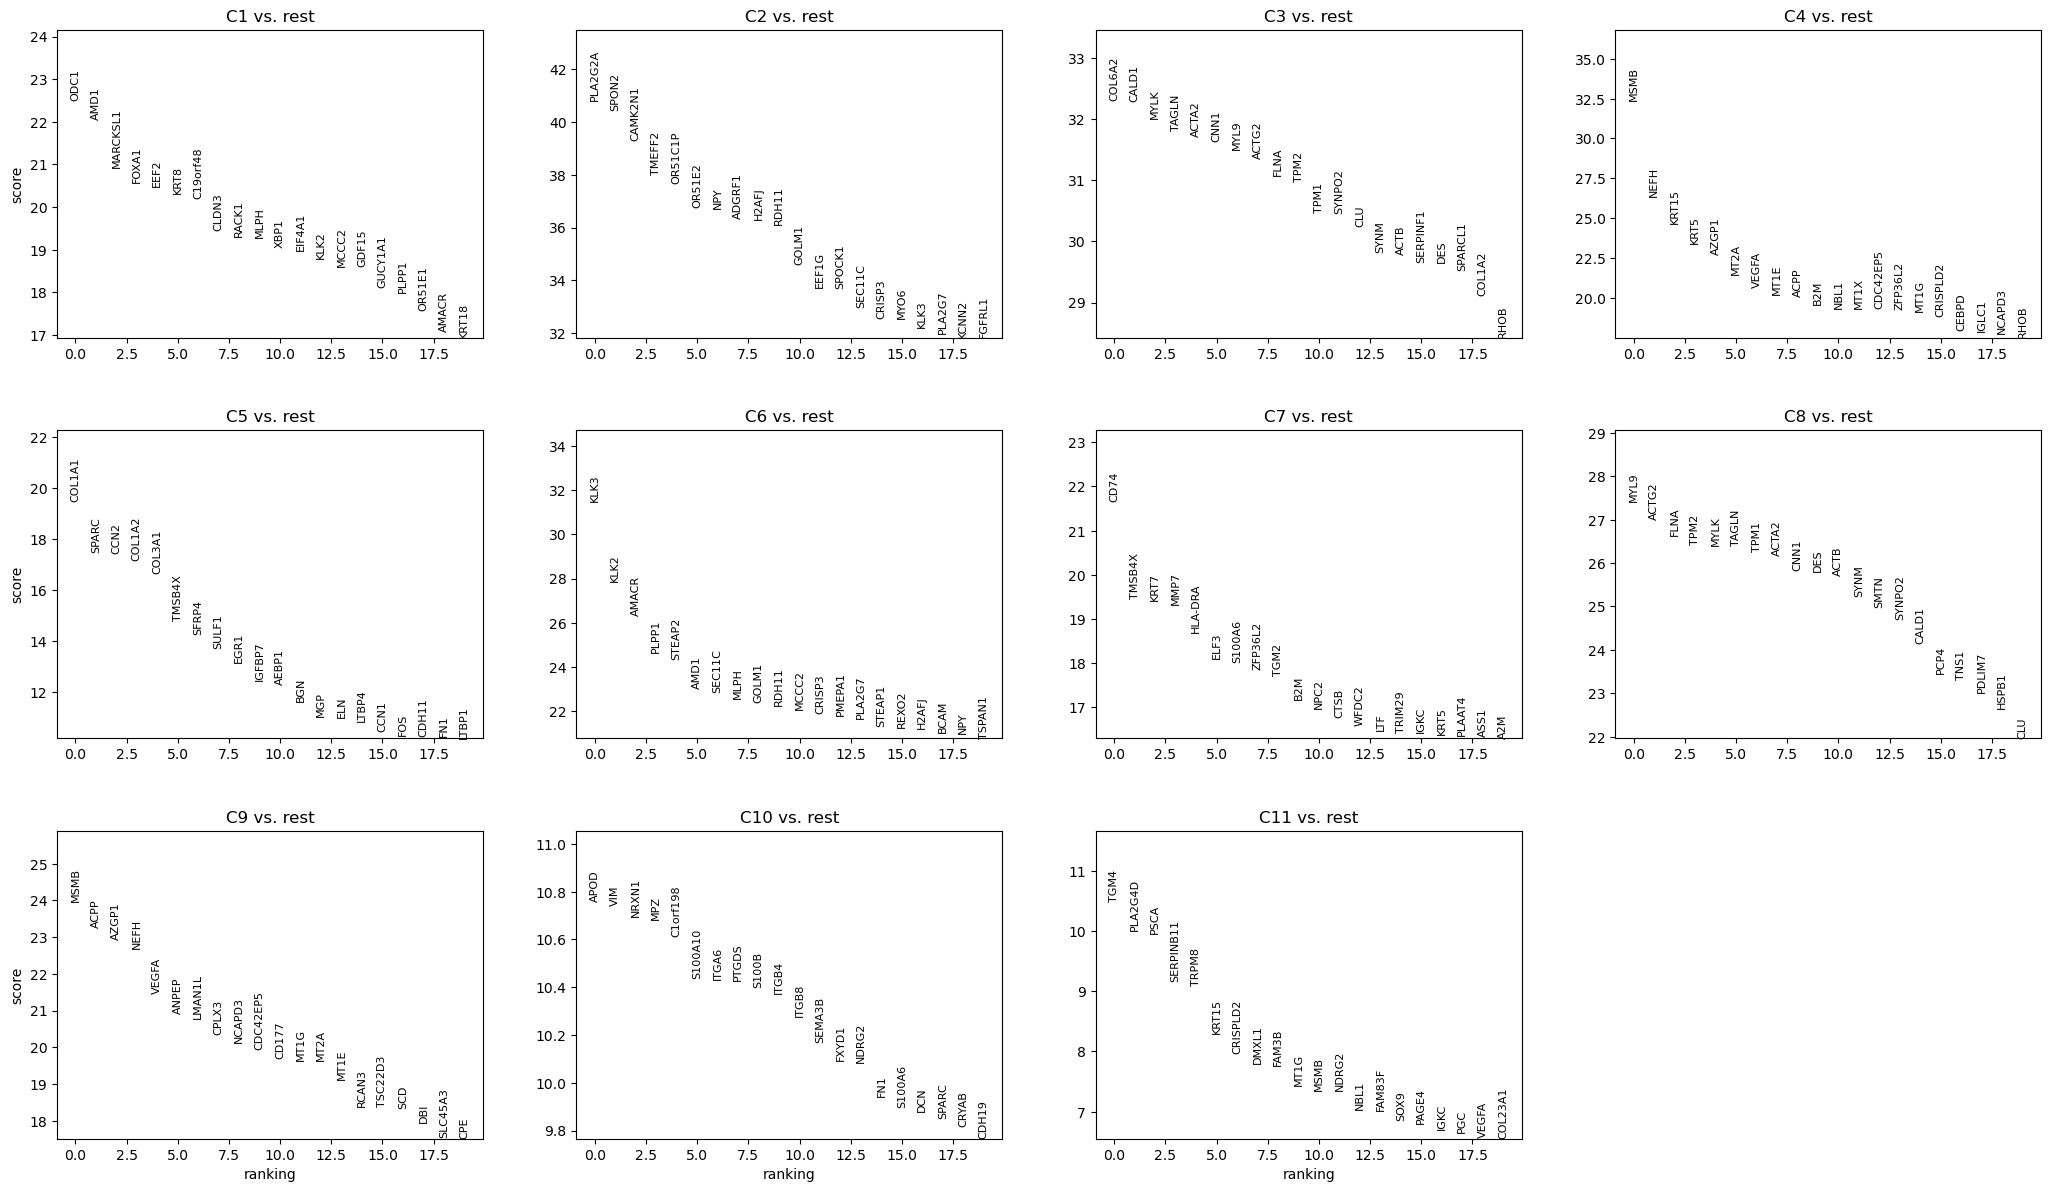

In [4]:
sc.tl.rank_genes_groups(adata, 'leiden', method='wilcoxon', layer='lognorm')
sc.pl.rank_genes_groups(adata, n_genes=20, sharey=False)

In [5]:
pd.DataFrame(adata.uns['rank_genes_groups']['names']).to_csv(f"{trial_name}/outputs/rank_gene_groups.csv")

Choos top-42 genes for Gene Enrichment analysis.